In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#Data Cleaning
#Change TotalCharges to numeric float values and drop all rows with NaN value
t = telco['TotalCharges']
telco['TotalCharges'] = pd.to_numeric(t, errors='coerce')
telco = telco.dropna()

# get dummy variables to categorical columns
telco = pd.get_dummies(telco, columns = ['gender','Dependents', 'Partner', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'])


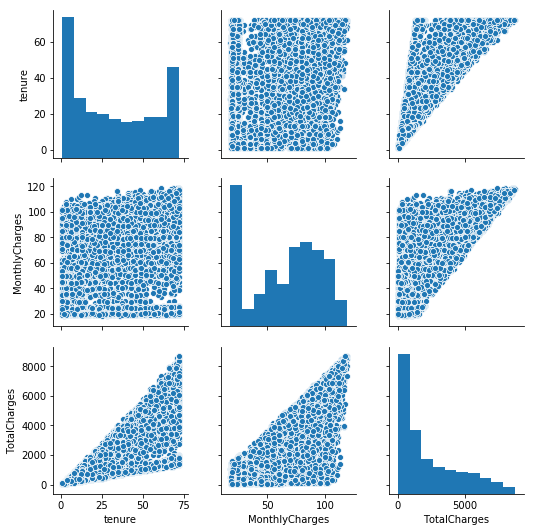

In [4]:
# Pairplot of Continuous Variables
sns.pairplot(telco[['tenure', 'MonthlyCharges', 'TotalCharges']])

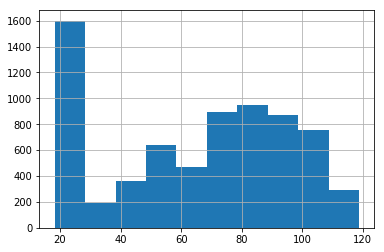

In [5]:
#histogram of Monthly Charges
telco['MonthlyCharges'].hist()

# Something odd about the monthly charges as high peak at tail

In [6]:
telco.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Dependents_No,Dependents_Yes,Partner_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,...,1,0,1,0,0,0,0,1,1,0
2,3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,...,0,0,0,1,0,0,0,1,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,...,1,0,1,0,1,0,0,0,1,0
4,9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1


In [7]:
# Random Forest
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time

start_time = time.time()

rfc = ensemble.RandomForestClassifier()
X = telco.drop(['Churn_Yes', 'customerID'], 1)
Y = telco['Churn_Yes']
rfc.fit(X, Y)

cross_val_score(rfc, X, Y, cv=5)

#Runtime
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


--- 0.29717493057250977 seconds ---


In [8]:
# Decision Tree
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

start_time = time.time()

#Initialize and train tree
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_features=1, max_depth=10, random_state=1337)
decision_tree.fit(X, Y)

#Render Tree
dot_data = tree.export_graphviz(decision_tree, out_file=None, feature_names=telco.columns.drop(['Churn_Yes', 'customerID'], 1), class_names=['Churn','Not Churn'], filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#Runtime
print("--- %s seconds ---" % (time.time() - start_time))

--- 10.260370969772339 seconds ---
